In [1]:
!pip install matplotlib
!pip install wordcloud

In [2]:
import pandas as pd
import glob
import re
from functools import reduce
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ansxo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ansxo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ansxo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
all_files = glob.glob('myCabinetExcelData*.xls')
all_files #출력하여 내용 확인

['myCabinetExcelData-10.xls',
 'myCabinetExcelData-2.xls',
 'myCabinetExcelData-3.xls',
 'myCabinetExcelData-4.xls',
 'myCabinetExcelData-5.xls',
 'myCabinetExcelData-6.xls',
 'myCabinetExcelData-7.xls',
 'myCabinetExcelData-8.xls',
 'myCabinetExcelData-9.xls',
 'myCabinetExcelData.xls']

In [4]:
all_files_data = [] #저장할 리스트
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0] #작업 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,A data colocation grid framework for big data ...,unknown,The Society,2018
1,NaN,2,Demystifying big data: Anatomy of big data dev...,"Shin, D.-H.","Elsevier Science B.V., Amsterdam.",2020
2,NaN,3,32.1 CREATING BIG VALUE WITH BIG DATA: PRELIMI...,"Hagoort, Karin; Deschamps, Peter; Scheepers, F...",Elsevier,2016
3,NaN,4,MPTCP Meets Big Data: Customizing Transmission...,"Xing, Yitao; Han, Jiangping; Xue, Kaiping; Liu...",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2020
4,NaN,5,Evaluation of Data Management Systems for Geos...,"Amirian, P.; Basiri, A.; Winstanley, A.",SPRINGER-VERLAG,2014
...,...,...,...,...,...,...
95,NaN,96,Spatial urban data system: A cloud-enabled big...,"Anejionu, Obinna C.D.; Thakuriah, Piyushimita ...","Elsevier Science B.V., Amsterdam.",2019
96,NaN,97,Paper 17: Data data everywhere: We are now in ...,"Liddell, M.",International Federation of Hydrographic Socie...,2014
97,NaN,98,An Incorrect Data Detection Method for Big Dat...,"Xu, Xuefang",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2019
98,NaN,99,When small data beats big data,"Faraway, Julian J.; Augustin, Nicole H.","Elsevier Science B.V., Amsterdam.",2018


In [5]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)
all_files_data_concat #출력하여 내용확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,A data colocation grid framework for big data ...,unknown,The Society,2018
1,NaN,2,Demystifying big data: Anatomy of big data dev...,"Shin, D.-H.","Elsevier Science B.V., Amsterdam.",2020
2,NaN,3,32.1 CREATING BIG VALUE WITH BIG DATA: PRELIMI...,"Hagoort, Karin; Deschamps, Peter; Scheepers, F...",Elsevier,2016
3,NaN,4,MPTCP Meets Big Data: Customizing Transmission...,"Xing, Yitao; Han, Jiangping; Xue, Kaiping; Liu...",IEEE INSTITUTE OF ELECTRICAL AND ELECTRONICS,2020
4,NaN,5,Evaluation of Data Management Systems for Geos...,"Amirian, P.; Basiri, A.; Winstanley, A.",SPRINGER-VERLAG,2014
...,...,...,...,...,...,...
995,NaN,96,Intelligent big data analysis: a review,"Tsai, Chun-Wei; Yang, Ya-Lan; Chiang, Ming-Cha...",Inderscience,2014
996,NaN,97,Clustering Big Spatiotemporal-Interval Data,"Shao, W.; Salim, F. D.; Song, A.; Bouguettaya, A.",unknown,2016
997,NaN,98,Analyzing Big Smart Metering Data Towards Diff...,"Pan, E.; Wang, D.; Han, Z.",unknown,2016
998,NaN,99,Agile Big Data Analytics for Web-Based Systems...,"Chen, H.; Kazman, R.; Haziyev, S.",unknown,2016


In [6]:
all_files_data_concat.to_csv('riss_bigdata.csv', encoding = 'utf-8', index = False)

In [7]:
all_title = all_files_data_concat['제목']
l_title = all_files_data_concat['제목']
all_title #출력하여 내용 확인

0      A data colocation grid framework for big data ...
1      Demystifying big data: Anatomy of big data dev...
2      32.1 CREATING BIG VALUE WITH BIG DATA: PRELIMI...
3      MPTCP Meets Big Data: Customizing Transmission...
4      Evaluation of Data Management Systems for Geos...
                             ...                        
995              Intelligent big data analysis: a review
996          Clustering Big Spatiotemporal-Interval Data
997    Analyzing Big Smart Metering Data Towards Diff...
998    Agile Big Data Analytics for Web-Based Systems...
999      Guest Editorial: Big Data Analytics and the Web
Name: 제목, Length: 1000, dtype: object

In [8]:
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [9]:
words = []

for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+"," ",str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [10]:
print(words)

romote', 'reproducibility', 'enable', 'big', 'data', 'analytics', 'clinical', 'research'], ['big', 'data', 'big', 'impact', 'realizing', 'potential', 'clinical', 'registry'], ['small', 'data', 'era', 'big', 'data'], ['big', 'data', 'approach', 'multi', 'experiment', 'data', 'management'], ['augmenting', 'data', 'warehouse', 'big', 'data'], ['urban', 'data', 'management', 'system', 'towards', 'big', 'data', 'analytics', 'internet', 'thing', 'based', 'smart', 'urban', 'environment', 'using', 'customized', 'hadoop'], ['big', 'smartphone', 'data', 'worldwide', 'research', 'mobile', 'data', 'challenge'], ['new', 'data', 'strategy', 'nonprobability', 'sampling', 'mobile', 'big', 'data'], ['bridging', 'data', 'capacity', 'gap', 'big', 'data', 'storage'], ['big', 'data', 'recommendation', 'engine', 'framework', 'based', 'local', 'pattern', 'analytics', 'strategy', 'mining', 'multi', 'sourced', 'big', 'data'], ['modern', 'hybrid', 'big', 'data', 'warehouse', 'architecture'], ['wrangling', 'big'

In [11]:
words2 = list(reduce(lambda x, y:x+y, words))
print(words2)

lic', 'cloud', 'platform', 'context', 'aware', 'data', 'quality', 'assessment', 'big', 'data', 'big', 'data', 'smart', 'data', 'algorithm', 'cross', 'evaluation', 'novel', 'method', 'large', 'scale', 'survey', 'analysis', 'digital', 'data', 'stream', 'creating', 'value', 'real', 'time', 'flow', 'big', 'data', 'big', 'data', 'growing', 'big', 'brother', 'turn', 'big', 'data', 'smart', 'data', 'open', 'data', 'prevent', 'research', 'fraud', 'promote', 'reproducibility', 'enable', 'big', 'data', 'analytics', 'clinical', 'research', 'big', 'data', 'big', 'impact', 'realizing', 'potential', 'clinical', 'registry', 'small', 'data', 'era', 'big', 'data', 'big', 'data', 'approach', 'multi', 'experiment', 'data', 'management', 'augmenting', 'data', 'warehouse', 'big', 'data', 'urban', 'data', 'management', 'system', 'towards', 'big', 'data', 'analytics', 'internet', 'thing', 'based', 'smart', 'urban', 'environment', 'using', 'customized', 'hadoop', 'big', 'smartphone', 'data', 'worldwide', 'res

In [12]:
count = Counter(words2)
count

'recognise': 1,
         'support': 11,
         'evidence': 5,
         'based': 57,
         'practice': 9,
         'versatile': 1,
         'intensive': 5,
         'computing': 31,
         'retrieval': 3,
         'hdac': 1,
         'high': 7,
         'dimensional': 2,
         'aggregation': 1,
         'control': 7,
         'algorithm': 14,
         'wireless': 3,
         'sensor': 5,
         'schema': 1,
         'theory': 7,
         'engineering': 6,
         'gene': 1,
         'expression': 1,
         'programming': 2,
         'spark': 4,
         'real': 15,
         'sentiment': 7,
         'prediction': 10,
         'streaming': 1,
         'account': 1,
         'perspective': 22,
         'introduction': 12,
         'representation': 3,
         'science': 42,
         'minitrack': 1,
         'carpool': 1,
         'enabling': 2,
         'crowd': 1,
         'cooperation': 1,
         'pervasive': 1,
         'ai': 2,
         'review': 22,
         'robust'

In [13]:
word_count=dict()

for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" %(tag, counts))

data : 1625
big : 1354
analytics : 139
analysis : 61
using : 58
based : 57
system : 51
management : 49
mining : 43
approach : 42
science : 42
challenge : 42
model : 39
new : 39
smart : 37
research : 35
health : 34
cloud : 33
computing : 31
opportunity : 31
processing : 30
driven : 26
framework : 25
quality : 25
learning : 25
information : 24
privacy : 24
survey : 24
application : 23
service : 23
technology : 23
small : 23
issue : 23
earth : 23
open : 22
era : 22
knowledge : 22
perspective : 22
review : 22
method : 22
business : 22
process : 21
time : 21
social : 21
platform : 20
deal : 20
network : 20
need : 20
large : 20
design : 19


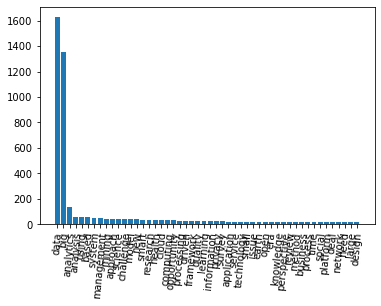

In [14]:
sorted_keys = sorted(word_count, key = word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_keys), rotation = '85')
plt.show()

In [15]:
all_files_data_concat['doc_count']= 0
summary_year = all_files_data_concat.groupby('출판일' , as_index = False)['doc_count'].count()
summary_year #출력하여 내용 확인

,출판일,doc_count
0,1996,1
1,1998,1
2,2003,1
3,2004,2
4,2007,2
5,2008,1
6,2009,2
7,2010,2
8,2011,6
9,2012,21


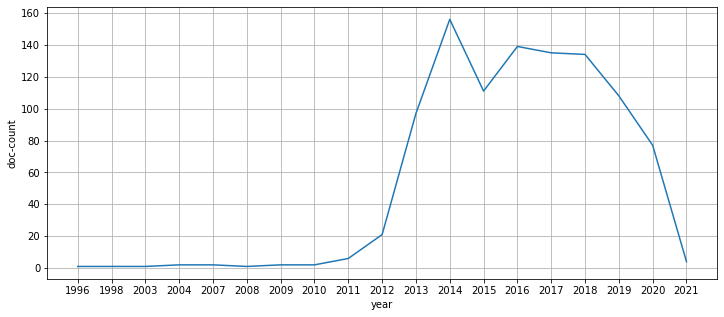

In [16]:
plt.figure(figsize=(12,5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

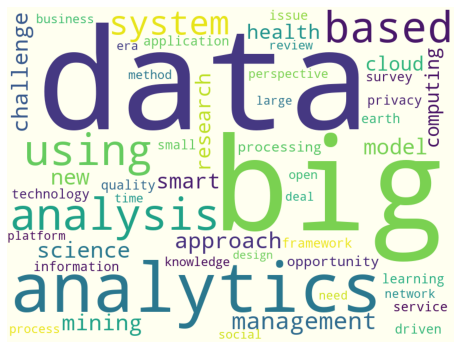

In [17]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color='ivory', stopwords=stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize= (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [18]:
cloud.to_file("riss_bigdata_wordCloud.jpg")